In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [74]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [75]:
df = df.dropna()

In [76]:
df["pickup_datetime"] = pd.to_datetime(df.pickup_datetime)

In [77]:
df["day"] = df["pickup_datetime"].apply(lambda x:x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x:x.hour)
df["month"] = df["pickup_datetime"].apply(lambda x:x.month)
df["year"] = df["pickup_datetime"].apply(lambda x:x.year)

In [78]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014


In [79]:
import calendar

df["weekday"] = df["pickup_datetime"].apply(lambda x: calendar.day_name[x.weekday()])
# df["weekday"] = df["weekday"].map({"Sunday" : 0,"Monday" : 1,"Tuesday" : 2,"


In [80]:
label_encoder = LabelEncoder()

df["weekday"] = label_encoder.fit_transform(df["weekday"])
df["weekday"]

0         4
1         0
2         1
3         0
4         4
         ..
199995    3
199996    0
199997    1
199998    6
199999    2
Name: weekday, Length: 199999, dtype: int32

In [81]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'day', 'hour', 'month', 'year',
       'weekday'],
      dtype='object')

In [82]:
def getoutliers(data):
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.75)
    iqr = q2 - q1
    outliers = data[(data < q1 - iqr*1) | (data > q2 + iqr*1)]
    return outliers

In [83]:
outliers = getoutliers(df["fare_amount"])

<Axes: ylabel='fare_amount'>

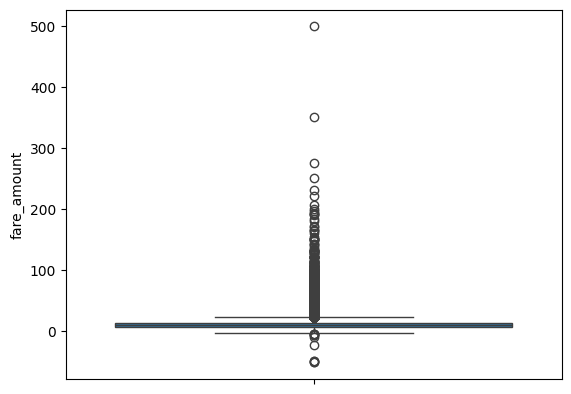

In [84]:
sns.boxplot(df["fare_amount"])

In [85]:
df.drop(outliers.index,axis=0,inplace=True)

In [91]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'day', 'hour', 'month', 'year',
       'weekday'],
      dtype='object')

<Axes: ylabel='fare_amount'>

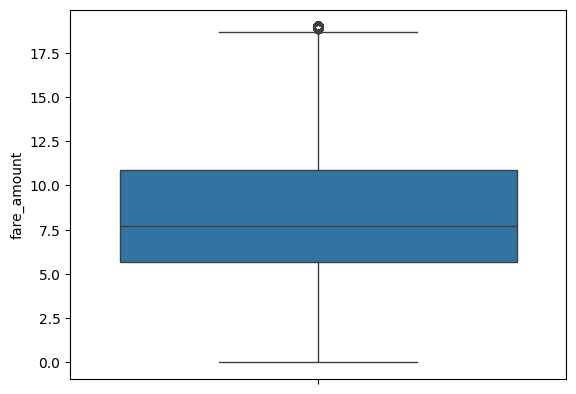

In [86]:
sns.boxplot(df["fare_amount"])

In [92]:
df = df[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'day', 'hour', 'month', 'year',
       'weekday']]

In [93]:
cormat = df.corr()

<Axes: >

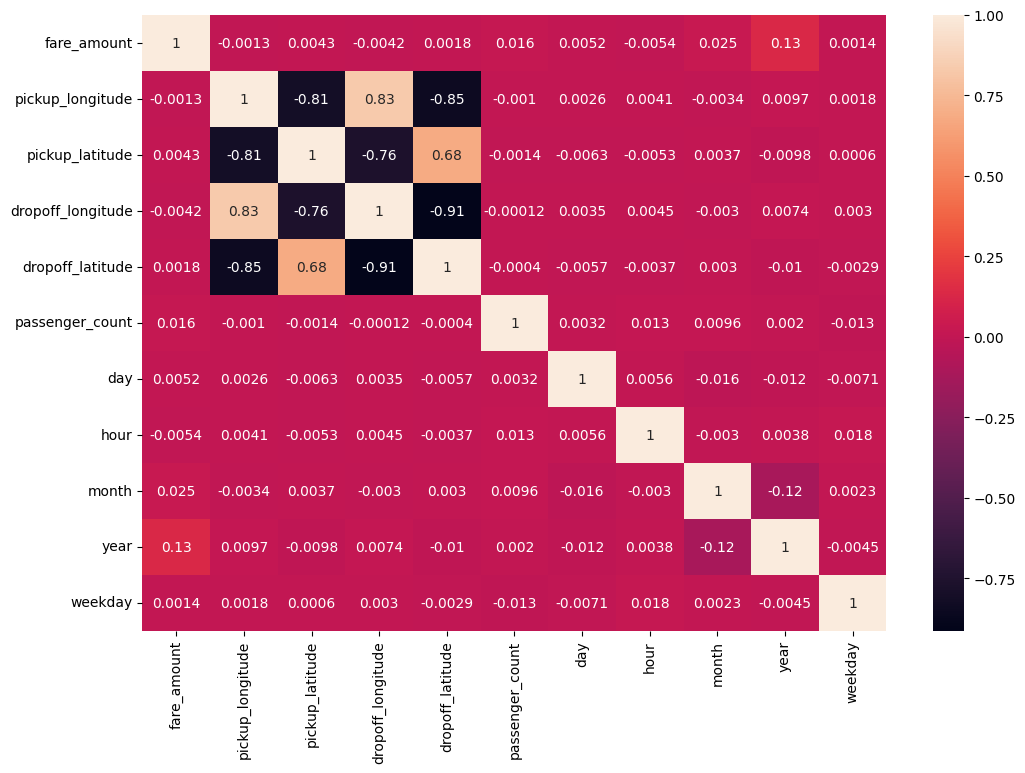

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(cormat,annot=True)

In [99]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'day',
       'hour', 'month', 'year', 'weekday'],
      dtype='object')

In [100]:
x = df[[ 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'day',
       'hour', 'month', 'year', 'weekday']]
y = df["fare_amount"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [102]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_results = linear_model.predict(X_test)

In [104]:
r2_score(y_test,linear_results)

0.017905680876460717

In [105]:
root_mean_squared_error(y_test,linear_results)

3.6718706647603305

In [106]:
random_model = RandomForestRegressor()
random_model.fit(X_train,y_train)
random_results = random_model.predict(X_test)

In [107]:
r2_score(y_test,random_results)

0.7355844565876313

In [108]:
root_mean_squared_error(y_test,random_results)

1.9052600741575316